<a href="https://colab.research.google.com/github/Ana-Januario/python-data-analysis/blob/main/Exemplo_simples_valordoseguro_pelaidade.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Vamos construir uma rede neuronal simples com 2 camadas escondidas para modelar o valor do seguro (de qualquer coisa, vamos supor seguro de um carro) pela idade da pessoa.
Os dados serão adicionados manualmente e já serão adicionados valores normalizados.

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import torch
import torch.nn as nn

In [2]:
colors={'rosa':'#ff66c4', 'azul':'#5271ff', 'verde':'#7ED957', 'laranja':'#f6672a'}
plt.style.use('dark_background')
plt.rcParams['figure.figsize']=(8,6)
plt.rcParams['font.size']=15
bbox= dict(boxstyle="round", alpha=0.7, color=colors['rosa'])

**Gráficos**

In [3]:
def ativacao_sigmoid(x:float) -> float:
  return (1/(1+np.e**(-x)))

Text(0.5, 1.0, 'valor do seguro em função da idade (valores normalizados)')

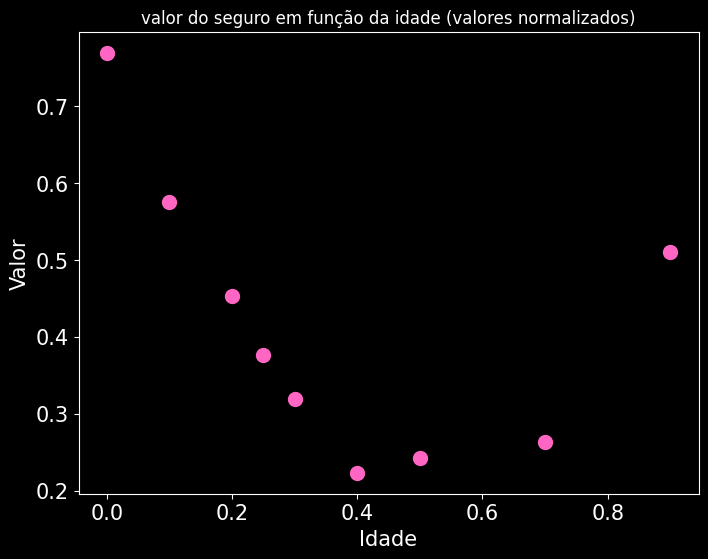

In [4]:
#para as redes neurais os valores devem estar normalizados
idade=np.array([0, 0.1, 0.2, 0.25, 0.3, 0.4, 0.5, 0.7, 0.9])
valor=np.array([((x-0.3)**2 -0.45*x+0.3)*2+np.random.randn()/60 for x in idade])
plt.scatter(idade, valor,s=100, color=colors['rosa'])
plt.xlabel('Idade')
plt.ylabel('Valor')
plt.title('valor do seguro em função da idade (valores normalizados)', fontdict={'size':12})

Temos os valores normalizados entre valor do seguro e idade do condutos. O valor do seguro cai ate certa idade e depois volta a subir.
O objetivo é tentar verificar qual curva a rede neural vai utilizar para modelar esse comportamento.

In [5]:
df=pd.DataFrame({'idade':idade, 'valor':valor})
df

,idade,valor
0,0.00,0.769341
1,0.10,0.575337
2,0.20,0.453767
3,0.25,0.376927
4,0.30,0.319490
5,0.40,0.223432
6,0.50,0.242241
7,0.70,0.263137
8,0.90,0.510145


In [24]:
x = torch.FloatTensor([df.idade.values.astype(float)])
y = torch.FloatTensor(df.valor.values.astype(float))
y = y.unsqueeze(1)
x = x.view(x.size(1), -1)

In [23]:
class Model(nn.Module):

  def __init__(self,hidden_neurons=2):
    super().__init__()
    self.hidden_neurons = hidden_neurons
    self.input_layer = nn.Linear(in_features=1, out_features=self.hidden_neurons)
    self.output_layer=nn.Linear(in_features=2, out_features=1)
    self.activation= nn.Sigmoid()

  def forward(self,x):
    out = self.input_layer(x)
    out = self.activation(out)
    out = self.output_layer(out)
    return out

In [8]:
EPOCHS=1000
LR=0.1

In [26]:
model = Model()
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(params=model.parameters(), lr=LR)

In [27]:
weights=[]
bias=[]

for epoch in range(EPOCHS):
  outputs=model.forward(x)
  loss = criterion(outputs,y)

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  weights.append(model.input_layer.weight)
  bias.append(model.input_layer.bias)
  out=outputs

In [28]:
print(f'Camada de Entrada:')
print(f'Pesos: {model.input_layer.weight.view(-1).numpy(force=True)}\nBias:  {model.input_layer.bias.view(-1).numpy(force=True)}')

Camada de Entrada:
Pesos: [-5.403995  -3.5800683]
Bias:  [0.72182477 3.136359  ]


In [29]:
print(f'Camada escondida:')
print(f'Pesos: {model.output_layer.weight.view(-1).numpy(force=True)}\nBias: {model.output_layer.bias.view(-1).numpy(force=True)}')

Camada escondida:
Pesos: [ 1.3998821 -1.3738762]
Bias: [1.1307921]


In [30]:
def tensor_to_numpy(tensor:torch.tensor):
  return tensor.view(-1).numpy(force=True)

In [31]:
x_range= torch.FloatTensor(np.arange(0,1.0,0.02))

**Primeiro neurónio**

In [32]:
y1= x_range*model.input_layer.weight[0][0]+model.input_layer.bias[0]
sigmoid1 = 1/(1+torch.exp(-y1))
saida1= sigmoid1*model.output_layer.weight[0][0]

In [33]:
y1_numpy =tensor_to_numpy(y1)
sigmoid1_numpy = tensor_to_numpy(sigmoid1)
saida1_numpy = tensor_to_numpy(saida1)

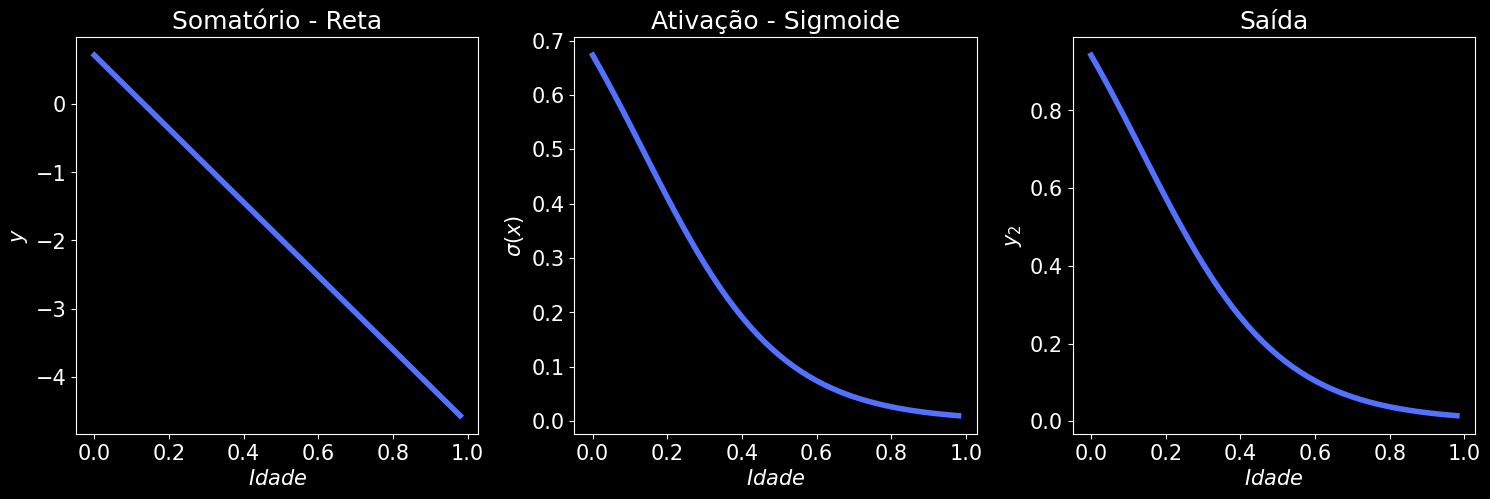

In [34]:
fig, ax = plt.subplots(nrows=1, ncols = 3, figsize=(15,5))

#somatorio perceptron
ax[0].plot(x_range, y1_numpy, lw=4, color=colors['azul'])
ax[0].set_xlabel(r'$Idade$')
ax[0].set_ylabel(r'$y$')
ax[0].set_title('Somatório - Reta')

#ativação sigmoide
ax[1].plot(x_range, sigmoid1_numpy, lw=4, color=colors['azul'])
ax[1].set_xlabel(r'$Idade$')
ax[1].set_ylabel(r'$\sigma(x)$')
ax[1].set_title('Ativação - Sigmoide')

#Após peso w2 - Entrada para o neuronio de saída
ax[2].plot(x_range, saida1_numpy, lw=4, color=colors['azul'])
ax[2].set_xlabel(r'$Idade$')
ax[2].set_ylabel(r'$y_2$')
ax[2].set_title('Saída')

plt.tight_layout(pad=0.5)

**Segundo Neurónio**

In [35]:
y2= x_range*model.input_layer.weight[1][0]+model.input_layer.bias[1]
sigmoid2=1/(1+torch.exp(-y2))
saida2=sigmoid2*model.output_layer.weight[0][1]

In [36]:
y2_numpy= tensor_to_numpy(y2)
sigmoid2_numpy=tensor_to_numpy(sigmoid2)
saida2_numpy= tensor_to_numpy(saida2)

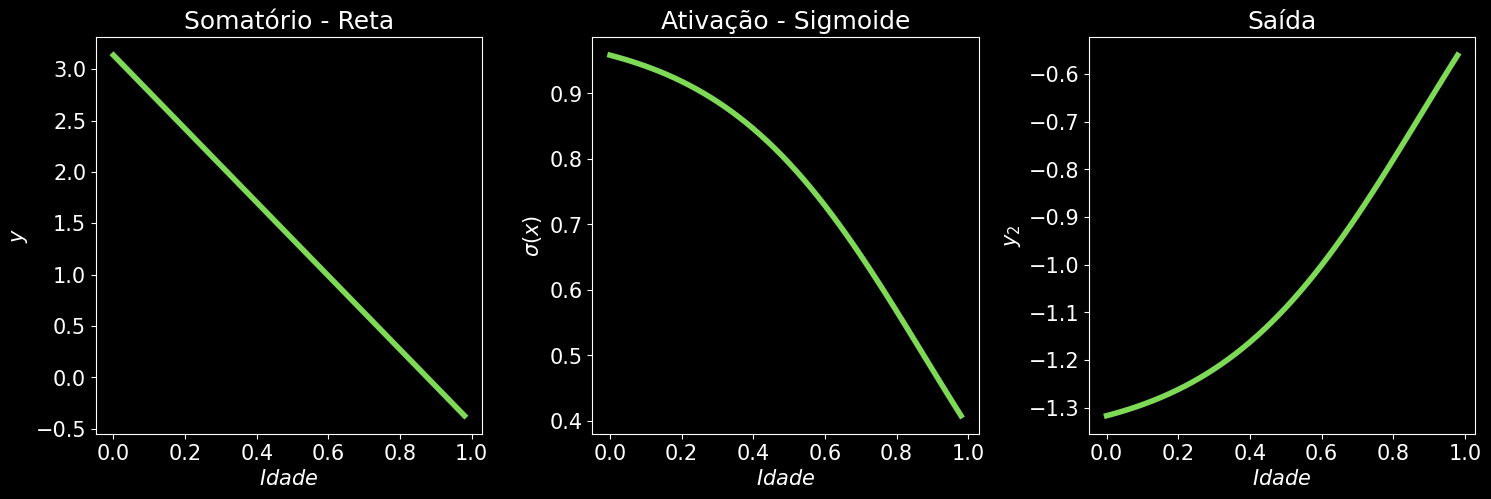

In [37]:
fig, ax = plt.subplots(nrows=1, ncols = 3, figsize=(15,5))

#somatorio perceptron
ax[0].plot(x_range, y2_numpy, lw=4, color=colors['verde'])
ax[0].set_xlabel(r'$Idade$')
ax[0].set_ylabel(r'$y$')
ax[0].set_title('Somatório - Reta')

#ativação sigmoide
ax[1].plot(x_range, sigmoid2_numpy, lw=4, color=colors['verde'])
ax[1].set_xlabel(r'$Idade$')
ax[1].set_ylabel(r'$\sigma(x)$')
ax[1].set_title('Ativação - Sigmoide')

#Após peso w2 - Entrada para o neuronio de saída
ax[2].plot(x_range, saida2_numpy, lw=4, color=colors['verde'])
ax[2].set_xlabel(r'$Idade$')
ax[2].set_ylabel(r'$y_2$')
ax[2].set_title('Saída')

plt.tight_layout(pad=0.5)

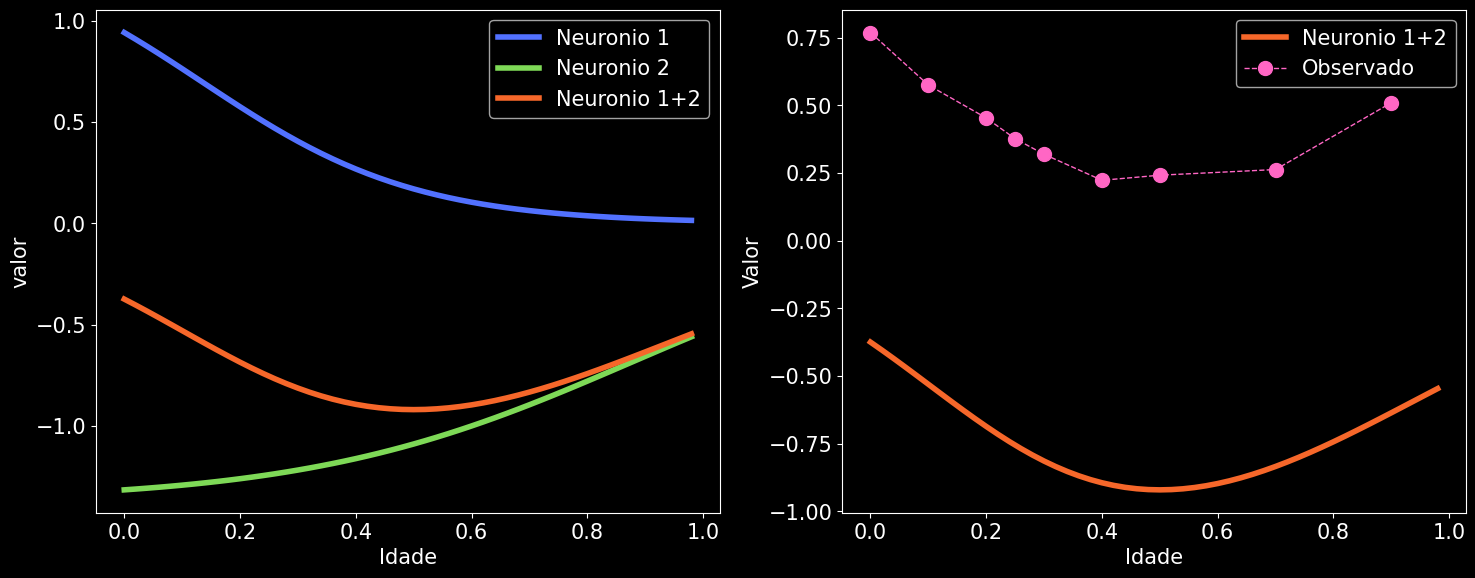

In [39]:
fig, ax=plt.subplots(1,2,figsize=(15,6))

ax[0].plot(x_range, saida1_numpy, lw=4, color=colors['azul'], label='Neuronio 1')
ax[0].plot(x_range, saida2_numpy, lw=4, color=colors['verde'], label='Neuronio 2')
ax[0].plot(x_range, saida1_numpy+saida2_numpy, lw=4, color=colors['laranja'], label='Neuronio 1+2')
ax[0].set_xlabel(r'Idade')
ax[0].set_ylabel(r'valor')
ax[0].legend()


ax[1].plot(x_range, saida1_numpy+saida2_numpy, lw=4, color=colors['laranja'], label='Neuronio 1+2')
ax[1].plot(x,y, linestyle='dashed', color=colors['rosa'], lw=1, marker='o', markerfacecolor=colors['rosa'], markersize=10, label='Observado')
ax[1].set_xlabel(r'Idade')
ax[1].set_ylabel(r'Valor')
ax[1].legend()

#aqui vamos apresentar os pontos sem o bias, para mostrar como as redes vão capturando as informações
#a reta laranja é formada a partir da reta azul+verde
plt.tight_layout(pad=1)

Vamos agora adicionar o bias

In [40]:
saida = saida1 + saida2 + model.output_layer.bias[0]
saida_numpy=tensor_to_numpy(saida)

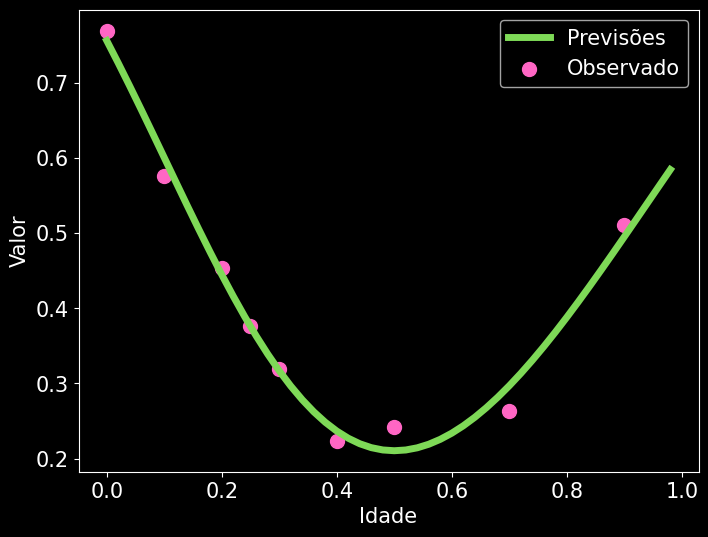

In [41]:
plt.plot(x_range, saida_numpy, color=colors['verde'], lw=5, label='Previsões')
plt.scatter(x,y,color=colors['rosa'], marker='o', s=100, label='Observado')
plt.xlabel('Idade')
plt.ylabel('Valor')
plt.legend()

O modelo fornecido por uma rede simples consegue captar de forma quase perfeita os dados.